In [63]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


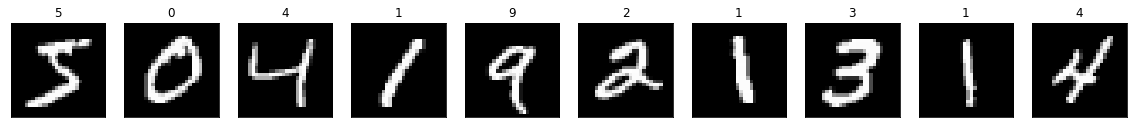

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

#plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(10):
    ax = fig.add_subplot(1,10,i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap = 'gray')
    ax.set_title(str(y_train[i]))

In [65]:
# rescale [0,255] to [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [66]:
from keras.utils import np_utils

#print first ten training labels
print('integer-values labels:')
print(y_train[:10])

#one hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten 
print('one hot encode:')
print(y_train[:10])

integer-values labels:
[5 0 4 1 9 2 1 3 1 4]
one hot encode:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [68]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

# define the model
model = Sequential()
model.add(Flatten(input_shape = X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

#summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [76]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [77]:
# Train the modue
from keras.callbacks import ModelCheckpoint
import time
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', verbose=1, save_best_only=True)
%timeit
hist=model.fit(X_train, y_train, batch_size=1024, epochs=10, validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 87us/step - loss: 0.3145 - acc: 0.9113 - val_loss: 0.1611 - val_acc: 0.9530

Epoch 00001: val_loss improved from inf to 0.16112, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 4s 79us/step - loss: 0.1804 - acc: 0.9444 - val_loss: 0.1196 - val_acc: 0.9652

Epoch 00002: val_loss improved from 0.16112 to 0.11958, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 4s 79us/step - loss: 0.1284 - acc: 0.9603 - val_loss: 0.1208 - val_acc: 0.9631

Epoch 00003: val_loss did not improve
Epoch 4/10
48000/48000 [==============================] - 4s 81us/step - loss: 0.1000 - acc: 0.9696 - val_loss: 0.1452 - val_acc: 0.9544

Epoch 00004: val_loss did not improve
Epoch 5/10
48000/48000 [==============================] - 4s 82us/step - loss: 0.0783 - acc: 0.9746 - val_loss: 0.0956 - val_acc: 0.9726



In [78]:
#load the weight that yields the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

In [79]:
#evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
#print test accuracy
print('test accuracy: %.4f%%' %accuracy)

test accuracy: 98.1000%
